In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

min_depth=3
host="am"

In [6]:
metadata = pd.read_csv("metagenomic_scripts/metagenomic_data_files/Poyet_sample_metadata.csv",index_col=0,sep="\t")
metadata["collection_date"] = pd.to_datetime(metadata["collection_date"])


metadata = metadata.loc[metadata["host"] == host]

date_diffs = (metadata["collection_date"].diff())/ np.timedelta64(1,'D')

In [7]:
T = np.cumsum(date_diffs)
T.iloc[0] = 0

In [8]:
species = "Bacteroides_vulgatus"
Poyet_snps_dir = "/u/scratch/r/rwolff/Poyet_midas_output/merged_midas_output/%s/snps/%s" % (host,species)
df_rf = pd.read_csv("%s/snps_freq.txt.bz2" % Poyet_snps_dir,sep="\t", low_memory = True,iterator=True,index_col=0)
df_depth = pd.read_csv("%s/snps_depth.txt.bz2" % Poyet_snps_dir,sep="\t", low_memory = True,iterator=True,index_col=0)

In [9]:
df_rf_chunk = df_rf.get_chunk(100000)
df_depth_chunk = df_depth.get_chunk(100000)

In [10]:
allele_freqs = (df_rf_chunk*(df_depth_chunk.mask(df_depth_chunk < min_depth))/df_depth_chunk)

In [11]:
best_samp = df_depth_chunk.mean().idxmax()

[]

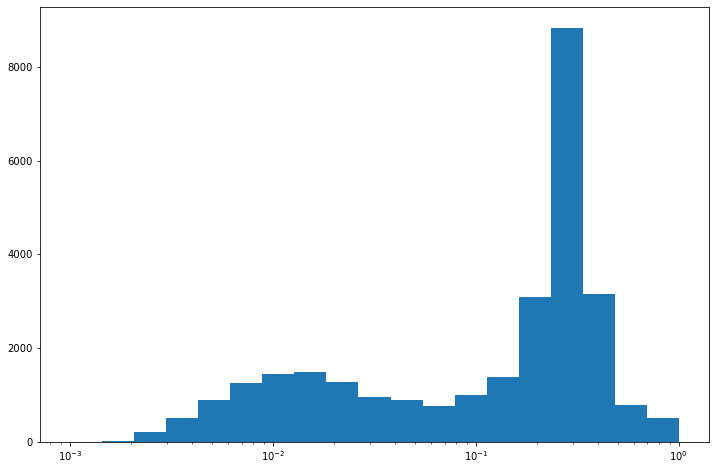

In [12]:
bins = np.logspace(-3,0,20)
fig,ax = plt.subplots(figsize=(12,8))

ax.hist(allele_freqs[best_samp].T,bins=bins);

ax.semilogx()
#ax.semilogy()

In [347]:
#allele_freqs_filter = allele_freqs.dropna()

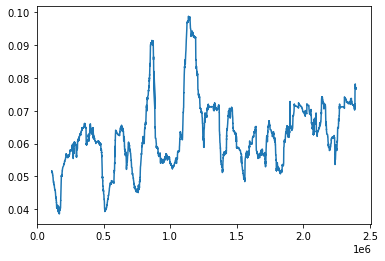

In [349]:
pi = allele_freqs.T.mean()*(1-allele_freqs.T.mean())
pi = pi.dropna()
#plt.plot(pi.index,pi.rolling(1))
plt.plot(pi.index,pi.rolling(1000).mean())

In [13]:
T = T[allele_freqs.columns].sort_values()
allele_freqs = allele_freqs[T.index]

In [14]:
allele_freqs = allele_freqs.mask(allele_freqs == 0)

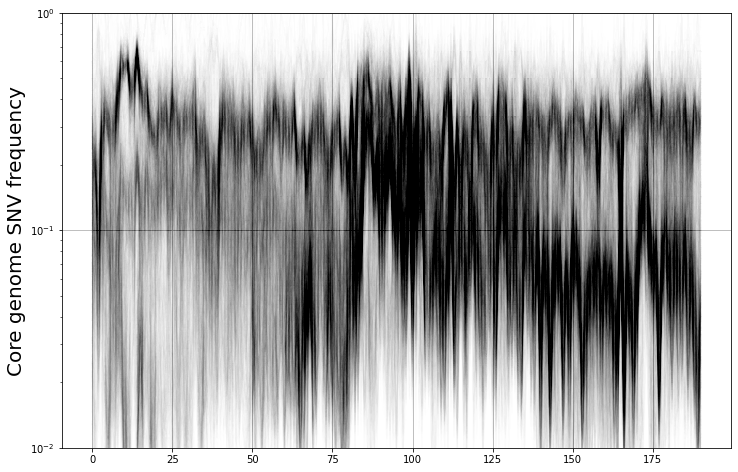

In [25]:
fig,ax = plt.subplots(figsize=(12,8))

for f in allele_freqs.iloc[:3000].values:
    #ax.plot(T.values,f,alpha=.002,color="grey")
    ax.plot(f,alpha=.005,color="k")
    
ax.grid(True)
ax.set_ylim([1e-2,1])
ax.set_ylabel("Core genome SNV frequency",size=20)
ax.semilogy();

In [50]:
high_freqs = allele_freqs.loc[allele_freqs.T.mean()>1e-1]

In [39]:
low_freqs = allele_freqs.loc[allele_freqs.T.mean()<1e-1]

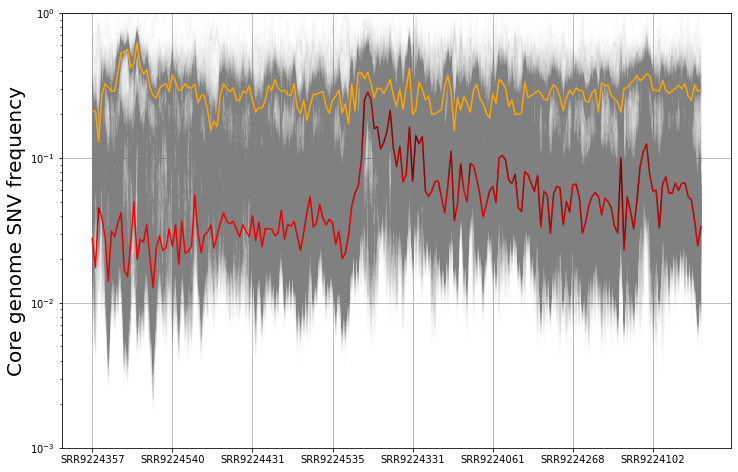

In [59]:
fig,ax = plt.subplots(figsize=(12,8))

for f in low_freqs.iloc[:4000].values:
    #ax.plot(T.values,f,alpha=.002,color="grey")
    ax.plot(f,alpha=.002,color="grey")

low_freqs.median().T.plot(color="red",ax=ax)

for f in high_freqs.iloc[:1500].values:
    #ax.plot(T.values,f,alpha=.002,color="grey")
    ax.plot(f,alpha=.002,color="grey")

high_freqs.median().T.plot(color="orange",ax=ax)

ax.grid(True)
ax.set_ylim([1e-3,1])
ax.set_ylabel("Core genome SNV frequency",size=20)
ax.semilogy();

In [16]:
Poyet_genes_dir = "/u/scratch/r/rwolff/Poyet_midas_output/merged_midas_output/%s/genes/%s" % (host,species)

In [17]:
df_c = pd.read_csv("%s/genes_copynum.txt" % Poyet_genes_dir,index_col=0,sep="\t")

In [18]:
T = T[df_c.columns].sort_values()
allele_freqs = allele_freqs[T.index]

df_c = df_c[T.index]

In [19]:
df_c_s = df_c
df_c_s = df_c_s.mask(df_c_s == 0)

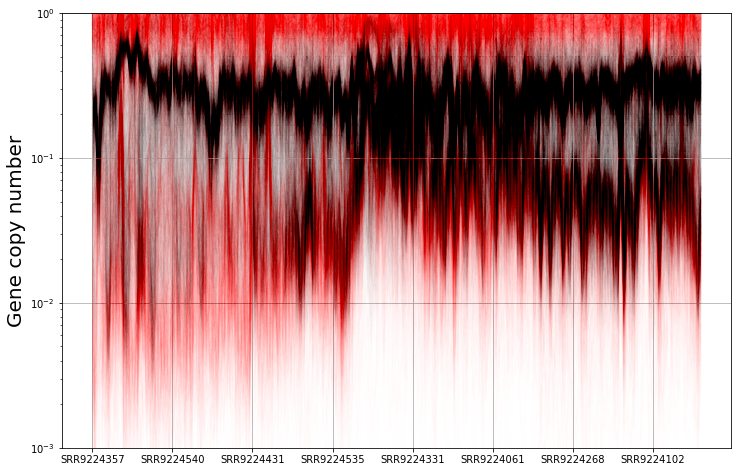

In [35]:
fig,ax = plt.subplots(figsize=(12,8))
df_c_s.iloc[:5000].T.plot(legend=None,color="red",alpha=.002,ax=ax,zorder=10);
ax.set_ylim([1e-3,1e0])
ax.grid(True)
ax.set_ylabel("Gene copy number",size=20);
ax.semilogy();

for f in allele_freqs.iloc[30000:].values:
    #ax.plot(T.values,f,alpha=.002,color="grey")
    ax.plot(f,alpha=.002,color="k",zorder=1)

[]

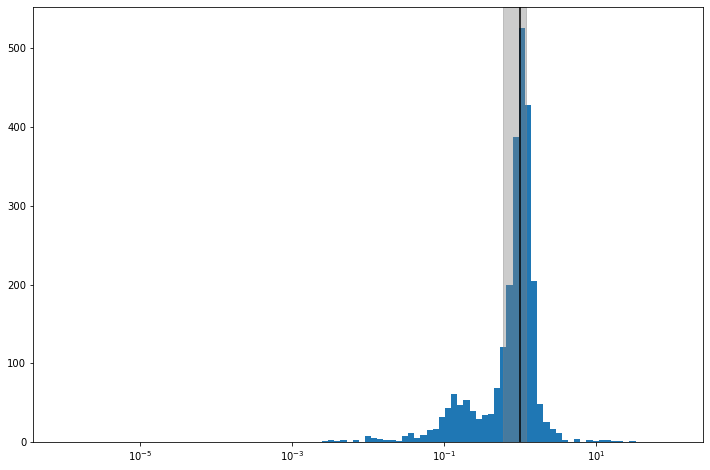

In [358]:
bins = np.logspace(-6,2,100)
fig,ax = plt.subplots(figsize=(12,8))

ax.hist(df_c_s.T.mean(),bins=bins);

ax.axvspan(.6,1.2,color="grey",alpha=.4)

ax.axvline(1,color="k")

ax.semilogx()
#ax.semilogy()